# Introduction to `Monitor`

The `Monitor` object is used to create a concurrent process that will monitor the host process memory and cpu usage, record notes, and plot current progress as needed.

In [1]:
import sys
sys.path.append('..')
import coproc

## Receiving Stats Client-side

In this example, I open the monitor and it runs while the inner code is executing. The monitor routinely checks for memory usage, and every so often sends a note to the monitor that is recorded. Uing `get_stats()` we can retrieve the statistics and plot it using `get_stats_plot()`. Notice that the notes appear in the figure.

['BaseWorkerProcess', 'ChannelID', 'Close', 'CloseRequestMessage', 'DataMessage', 'EncounteredErrorMessage', 'LazyPool', 'MemoryInfoNotAvailableError', 'Message', 'MessageFromProcess', 'MessageFromProcessType', 'MessageNotRecognizedError', 'MessageToProcess', 'MessageToProcessType', 'MessageType', 'Monitor', 'MonitorMessage', 'MonitorMessengerInterface', 'MonitorWorkerProcess', 'MultiMessenger', 'MultiQueue', 'Note', 'Pool', 'PriorityMessenger', 'PriorityMultiQueue', 'PriorityQueue', 'RecvPayloadType', 'ReplyData', 'RequestSaveMemoryFigureMessage', 'RequestStatsMessage', 'ResourceRequestedClose', 'SendPayloadType', 'Stat', 'StatsDataMessage', 'StatsResult', 'SubmitData', 'SubmitNoteMessage', 'UpdateChildProcessesMessage', 'UserfuncError', 'WorkerIsAlreadyAliveError', 'WorkerIsAlreadyDeadError', 'WorkerResource', 'WorkerResourcePool', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'annotations', 'baseworkerprocess', 

  0%|                                               | 0/1000000 [00:00<?, ?it/s]

 18%|█████▎                       | 183064/1000000 [00:00<00:00, 1830550.09it/s]

dump; new_note.details='dumping all memory'


 70%|█████████████████████         | 700838/1000000 [00:00<00:00, 882974.08it/s]

dump; new_note.details='dumping all memory'


100%|█████████████████████████████| 1000000/1000000 [00:01<00:00, 951835.92it/s]


dump; new_note.details='dumping all memory'


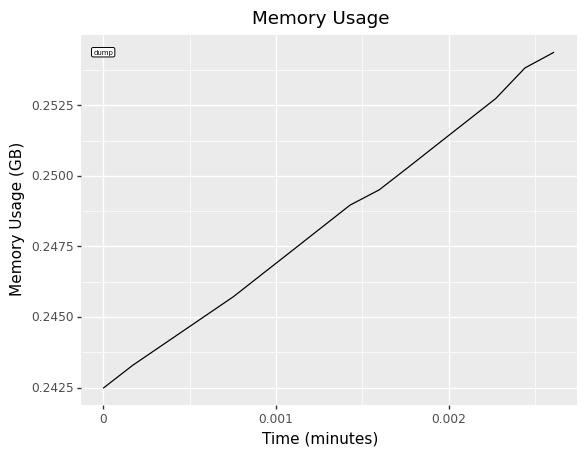

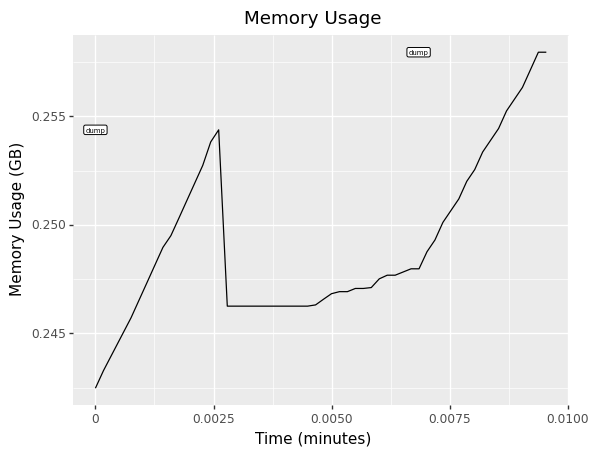

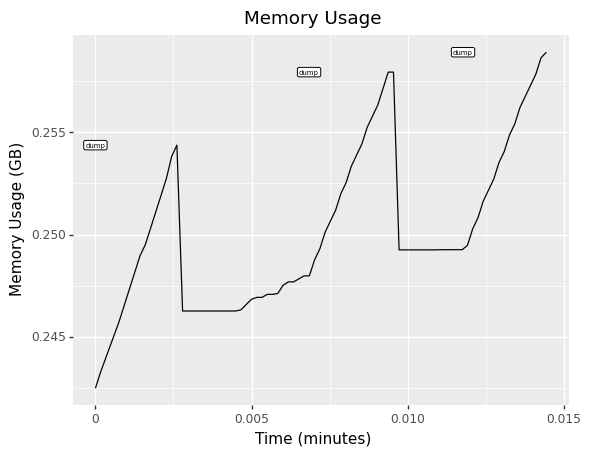

In [2]:
import time
import tqdm
with coproc.Monitor(snapshot_seconds=0.01) as m:
        
    l = list()
    for i in tqdm.tqdm(range(int(1e6)), ncols=80):
        l.append(i)
        if i > 0 and i % int(3e5) == 0:
            m.add_note('dump', 'dumping all memory', do_print=True)
            l = list() # dump memory
            
            stats = m.get_stats()
            p = stats.plot_memory(font_size=5)
            p.draw()